In [213]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import glob
import pandas as pd



In [214]:
# load each audio file
# create an array of pairs (singal, sample rate) for each emotion
happy = []
for filename in glob.glob('data_folder/happy/*.wav'):
    y, sr = librosa.load(filename)
    happy.append((y, sr))

sad = []
for filename in glob.glob('data_folder/sad/*.wav'):
    y, sr = librosa.load(filename)
    sad.append((y, sr))
    
angry = []
for filename in glob.glob('data_folder/angry/*.wav'):
    y, sr = librosa.load(filename)
    angry.append((y, sr))

fear = []
for filename in glob.glob('data_folder/fear/*.wav'):
    y, sr = librosa.load(filename)
    fear.append((y, sr))


In [215]:
# split into training and testing data
happy_train = happy[:int(len(happy)*0.7)]
happy_test = happy[int(len(happy)*0.7):]

sad_train = sad[:int(len(sad)*0.7)]
sad_test = sad[int(len(sad)*0.7):]

angry_train = angry[:int(len(angry)*0.7)]
angry_test = angry[int(len(angry)*0.7):]

fear_train = fear[:int(len(fear)*0.7)]
fear_test = fear[int(len(fear)*0.7):]

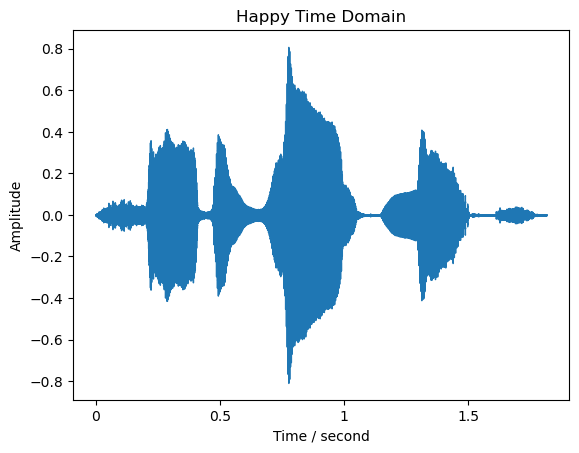

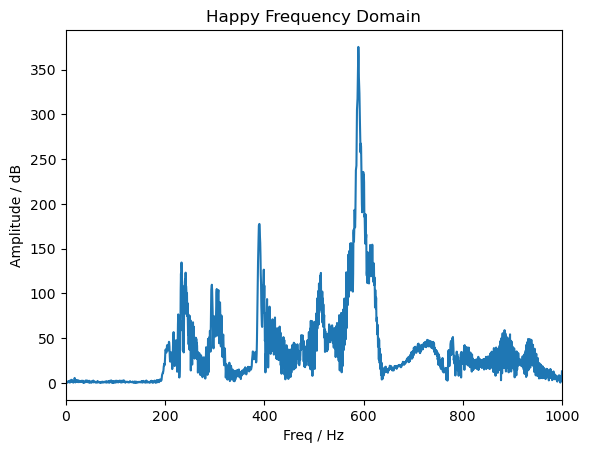

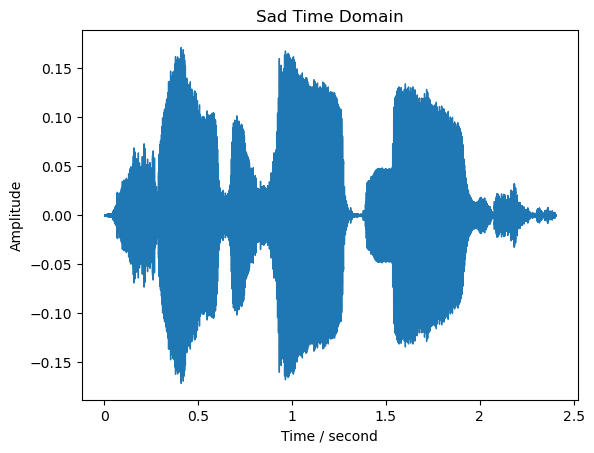

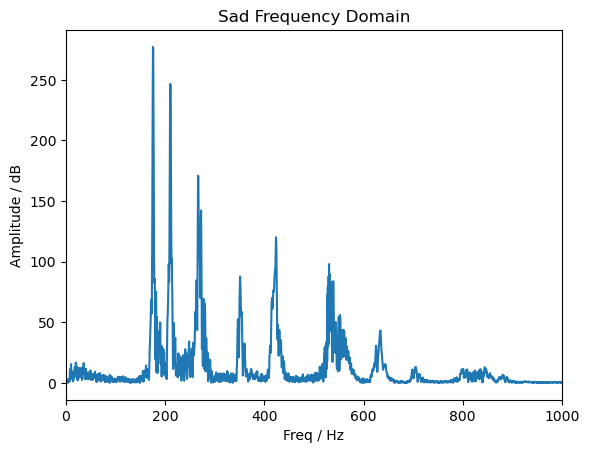

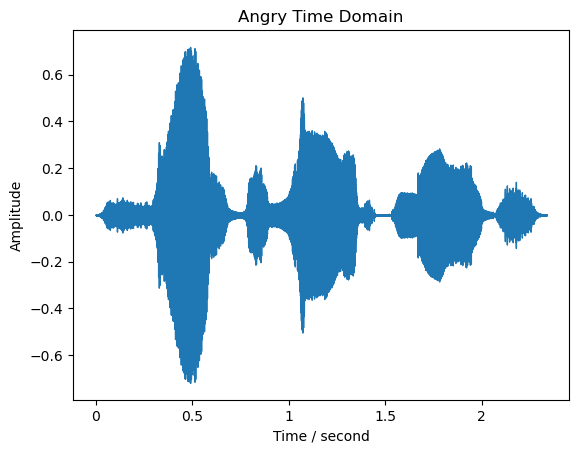

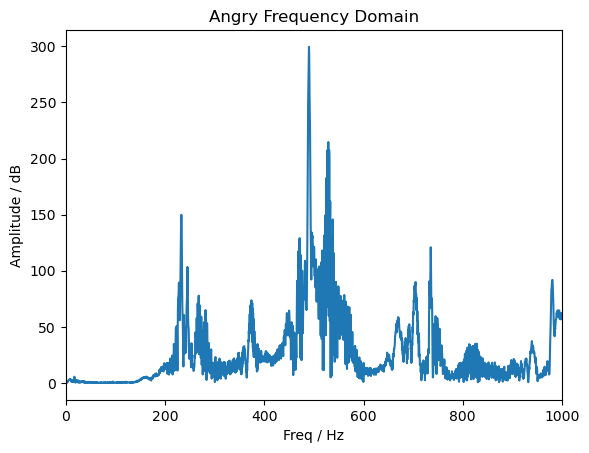

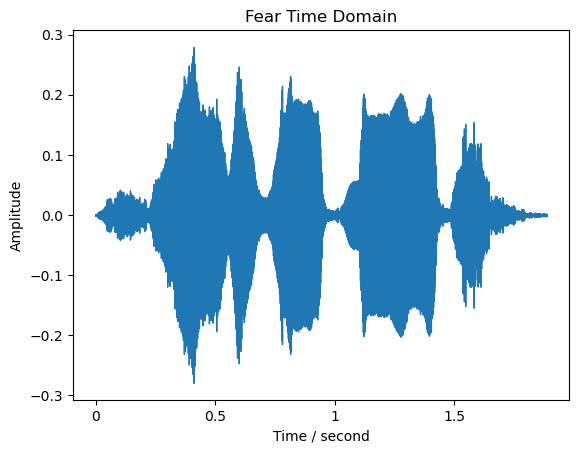

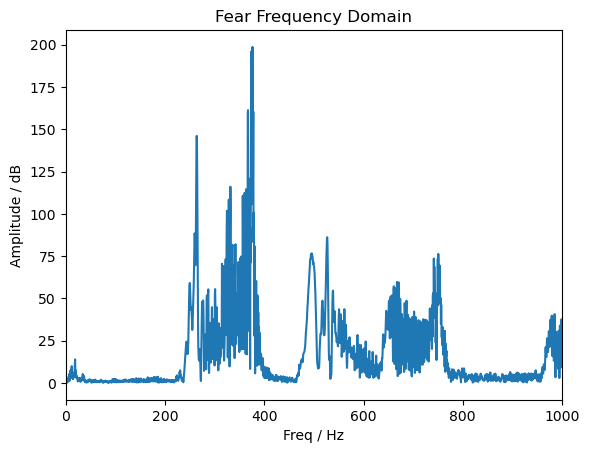

In [216]:
# find the label distribution

# select sample audio and plot them in time and frequency domain
sample_happy = happy_train[0]
sample_sad = sad_train[0]
sample_angry = angry_train[0]
sample_fear = fear_train[0]

# plot happy
# time domain
plt.figure(1)
librosa.display.waveshow(sample_happy[0], sr=sample_happy[1])
plt.title('Happy Time Domain')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# frequency domain
k = np.arange(len(sample_happy[0]))
T = len(sample_happy[0])/sample_happy[1]
frq = k/T
data = np.fft.fft(sample_happy[0])
plt.figure(2)
plt.plot(frq, abs(data))
plt.title('Happy Frequency Domain')
plt.xlabel('Freq / Hz')
plt.ylabel('Amplitude / dB')
plt.xlim([0, 1000])
plt.show()

# plot sad
# time domain
plt.figure(3)
librosa.display.waveshow(sample_sad[0], sr=sample_sad[1])
plt.title('Sad Time Domain')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# frequency domain
k = np.arange(len(sample_sad[0]))
T = len(sample_sad[0])/sample_sad[1]
frq = k/T
data = np.fft.fft(sample_sad[0])
plt.figure(4)
plt.plot(frq, abs(data))
plt.title('Sad Frequency Domain')
plt.xlabel('Freq / Hz')
plt.ylabel('Amplitude / dB')
plt.xlim([0, 1000])
plt.show()

# plot angry
# time domain
plt.figure(5)
librosa.display.waveshow(sample_angry[0], sr=sample_angry[1])
plt.title('Angry Time Domain')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# frequency domain
k = np.arange(len(sample_angry[0]))
T = len(sample_angry[0])/sample_angry[1]
frq = k/T
data = np.fft.fft(sample_angry[0])
plt.figure(6)
plt.plot(frq, abs(data))
plt.title('Angry Frequency Domain')
plt.xlabel('Freq / Hz')
plt.ylabel('Amplitude / dB')
plt.xlim([0, 1000])
plt.show()

# plot fear
# time domain
plt.figure(7)
librosa.display.waveshow(sample_fear[0], sr=sample_fear[1])
plt.title('Fear Time Domain')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# frequency domain
k = np.arange(len(sample_fear[0]))
T = len(sample_fear[0])/sample_fear[1]
frq = k/T
data = np.fft.fft(sample_fear[0])
plt.figure(8)
plt.plot(frq, abs(data))
plt.title('Fear Frequency Domain')
plt.xlabel('Freq / Hz')
plt.ylabel('Amplitude / dB')
plt.xlim([0, 1000])
plt.show()


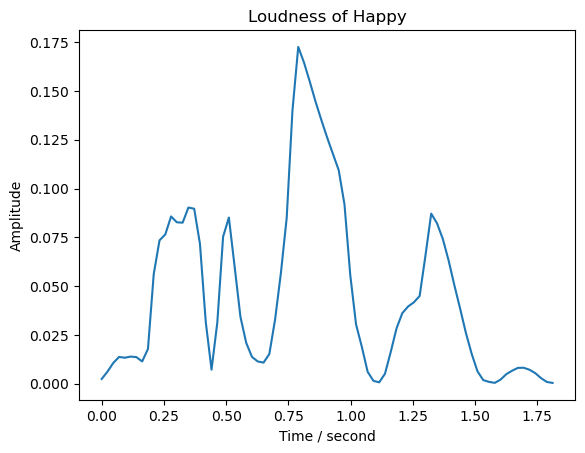

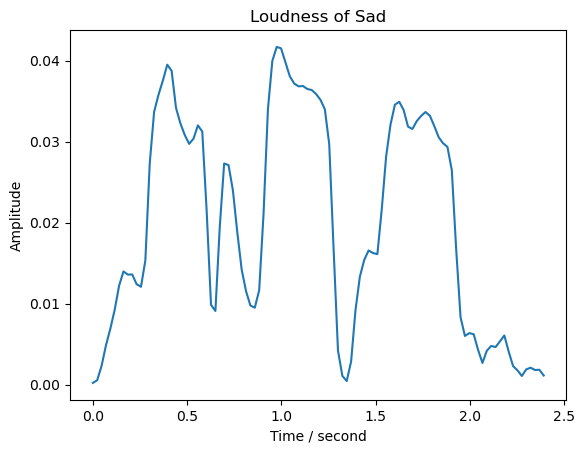

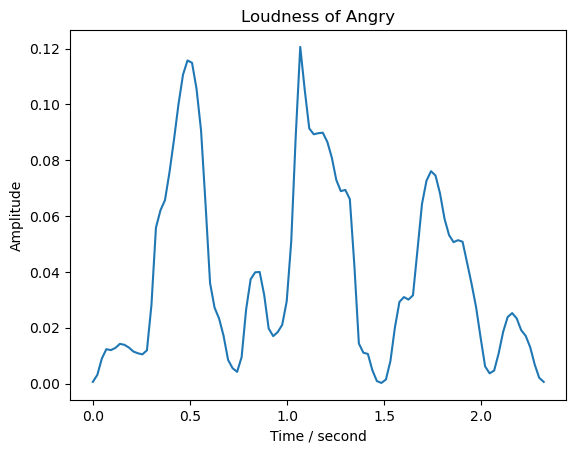

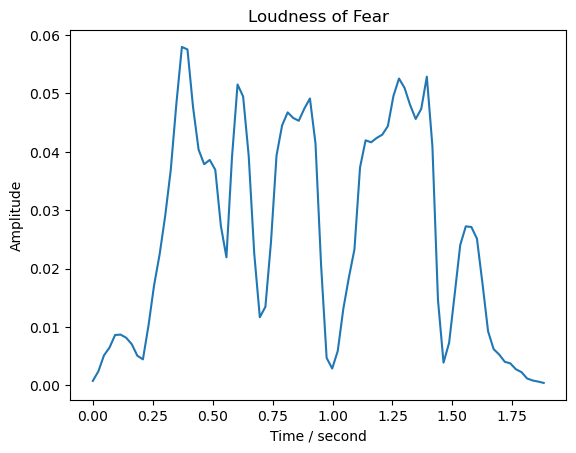

In [217]:
# loudness
# happy
loudness_happy = pd.DataFrame(columns=['loudness'])
for i in range(len(happy_train)):
    S, phase = librosa.magphase(librosa.stft(happy_train[i][0]))
    loudness_happy.loc[i] = [librosa.feature.rms(S=S)[0]]

plt.figure(9)
times = librosa.times_like(loudness_happy['loudness'][0])
plt.plot(times, loudness_happy['loudness'][0], label='loudness')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Loudness of Happy')
plt.show()

# sad
loudness_sad = pd.DataFrame(columns=['loudness'])
for i in range(len(sad_train)):
    S, phase = librosa.magphase(librosa.stft(sad_train[i][0]))
    loudness_sad.loc[i] = [librosa.feature.rms(S=S)[0]]

plt.figure(10)
times = librosa.times_like(loudness_sad['loudness'][0])
plt.plot(times, loudness_sad['loudness'][0], label='loudness')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Loudness of Sad')
plt.show()

# angry
loudness_angry = pd.DataFrame(columns=['loudness'])
for i in range(len(angry_train)):
    S, phase = librosa.magphase(librosa.stft(angry_train[i][0]))
    loudness_angry.loc[i] = [librosa.feature.rms(S=S)[0]]

plt.figure(11)
times = librosa.times_like(loudness_angry['loudness'][0])
plt.plot(times, loudness_angry['loudness'][0], label='loudness')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Loudness of Angry')
plt.show()

# fear
loudness_fear = pd.DataFrame(columns=['loudness'])
for i in range(len(fear_train)):
    S, phase = librosa.magphase(librosa.stft(fear_train[i][0]))
    loudness_fear.loc[i] = [librosa.feature.rms(S=S)[0]]

plt.figure(12)
times = librosa.times_like(loudness_fear['loudness'][0])
plt.plot(times, loudness_fear['loudness'][0], label='loudness')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Loudness of Fear')
plt.show()

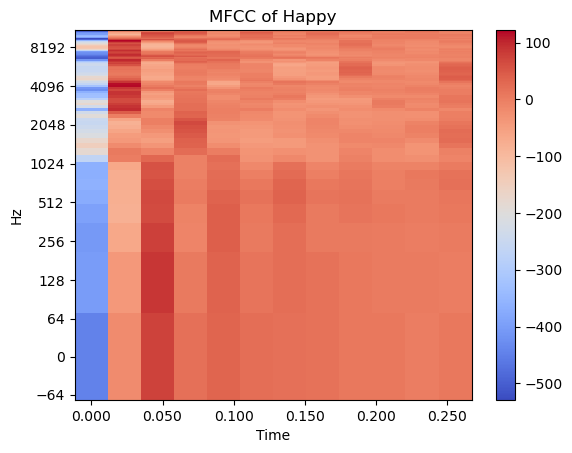

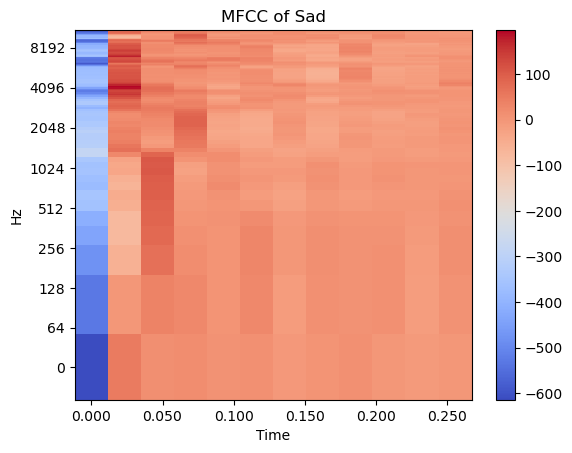

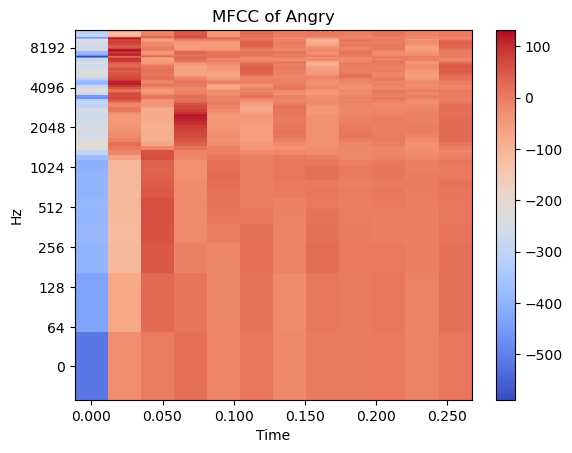

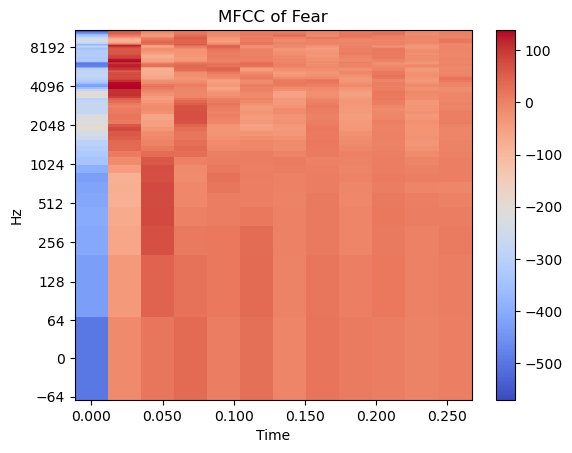

In [218]:
# mfcc (mel-frequency cepstral coefficients)
# happy
mfcc_happy = pd.DataFrame(columns=['mfcc'])
for i in range(len(happy_train)):
    mfccs = librosa.feature.mfcc(y=happy_train[i][0], sr=happy_train[i][1], n_mfcc=12)
    mfcc_happy.loc[i] = [mfccs.T]

plt.figure(13)
librosa.display.specshow(mfcc_happy['mfcc'][0],sr=happy_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC of Happy')
plt.show()

# sad
mfcc_sad = pd.DataFrame(columns=['mfcc'])
for i in range(len(sad_train)):
    mfccs = librosa.feature.mfcc(y=sad_train[i][0], sr=sad_train[i][1], n_mfcc=12)
    mfcc_sad.loc[i] = [mfccs.T]

plt.figure(14)
librosa.display.specshow(mfcc_sad['mfcc'][0],sr=sad_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC of Sad')
plt.show()

# angry
mfcc_angry = pd.DataFrame(columns=['mfcc'])
for i in range(len(angry_train)):
    mfccs = librosa.feature.mfcc(y=angry_train[i][0], sr=angry_train[i][1], n_mfcc=12)
    mfcc_angry.loc[i] = [mfccs.T]

plt.figure(15)
librosa.display.specshow(mfcc_angry['mfcc'][0],sr=angry_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC of Angry')
plt.show()

# fear
mfcc_fear = pd.DataFrame(columns=['mfcc'])
for i in range(len(fear_train)):
    mfccs = librosa.feature.mfcc(y=fear_train[i][0], sr=fear_train[i][1], n_mfcc=12)
    mfcc_fear.loc[i] = [mfccs.T]

plt.figure(16)
librosa.display.specshow(mfcc_fear['mfcc'][0],sr=fear_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC of Fear')
plt.show()

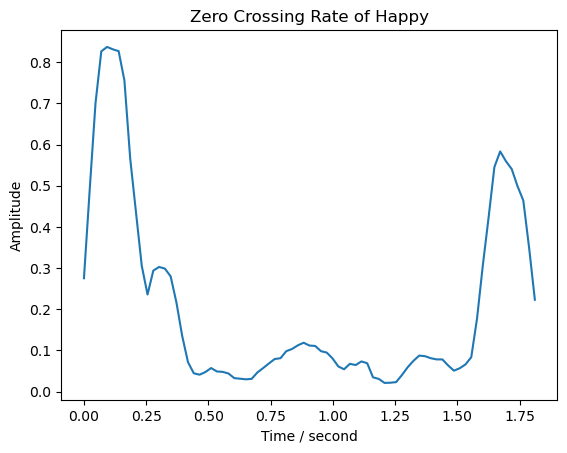

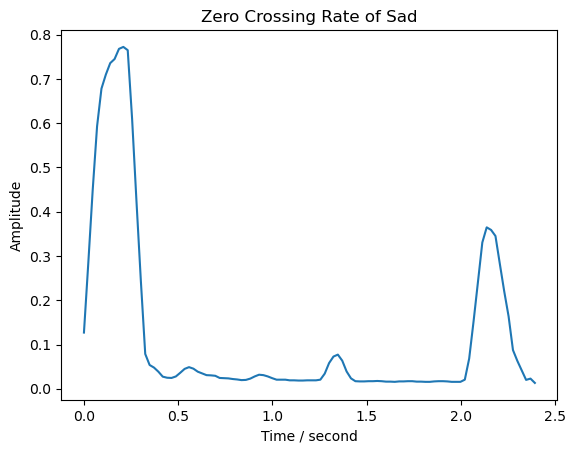

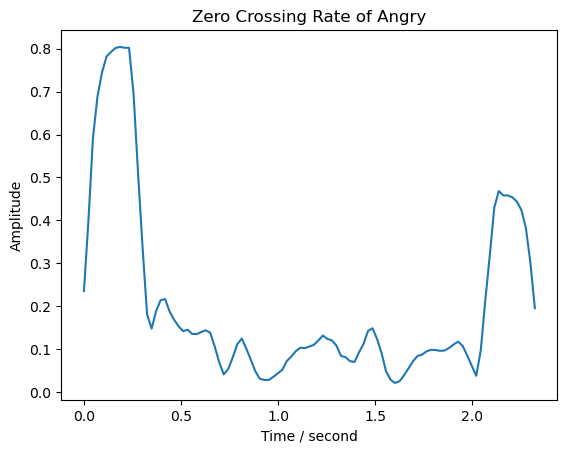

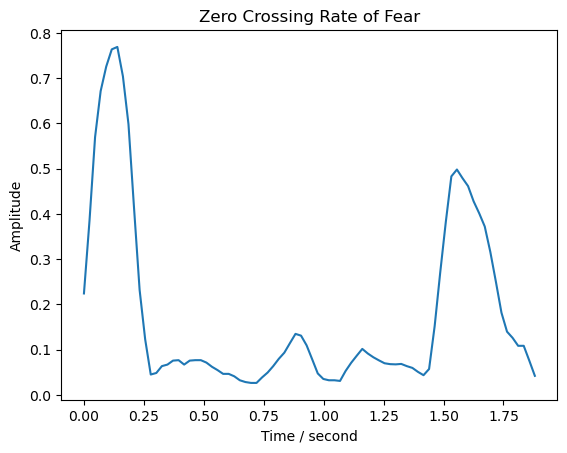

In [219]:
# zero crossing rate
# happy
zcr_happy = pd.DataFrame(columns=['zcr'])
for i in range(len(happy_train)):
    zcr_happy.loc[i] = [librosa.feature.zero_crossing_rate(y=happy_train[i][0])[0]]

plt.figure(17)
times = librosa.times_like(zcr_happy['zcr'][0])
plt.plot(times, zcr_happy['zcr'][0], label='zcr')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Zero Crossing Rate of Happy')
plt.show()

# sad
zcr_sad = pd.DataFrame(columns=['zcr'])
for i in range(len(sad_train)):
    zcr_sad.loc[i] = [librosa.feature.zero_crossing_rate(y=sad_train[i][0])[0]]

plt.figure(18)
times = librosa.times_like(zcr_sad['zcr'][0])
plt.plot(times, zcr_sad['zcr'][0], label='zcr')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Zero Crossing Rate of Sad')
plt.show()

# angry
zcr_angry = pd.DataFrame(columns=['zcr'])
for i in range(len(angry_train)):
    zcr_angry.loc[i] = [librosa.feature.zero_crossing_rate(y=angry_train[i][0])[0]]

plt.figure(19)
times = librosa.times_like(zcr_angry['zcr'][0])
plt.plot(times, zcr_angry['zcr'][0], label='zcr')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Zero Crossing Rate of Angry')
plt.show()

# fear
zcr_fear = pd.DataFrame(columns=['zcr'])
for i in range(len(fear_train)):
    zcr_fear.loc[i] = [librosa.feature.zero_crossing_rate(y=fear_train[i][0])[0]]

plt.figure(20)
times = librosa.times_like(zcr_fear['zcr'][0])
plt.plot(times, zcr_fear['zcr'][0], label='zcr')
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title('Zero Crossing Rate of Fear')
plt.show()

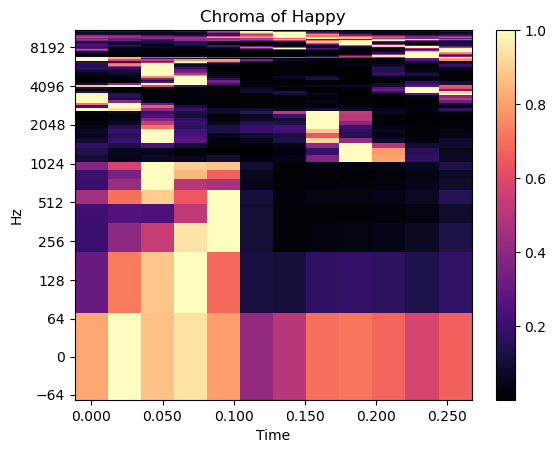

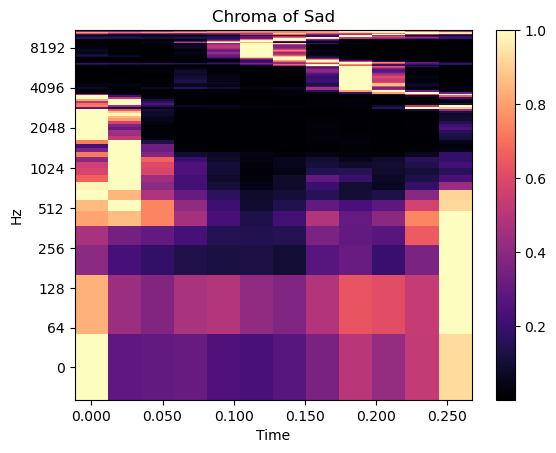

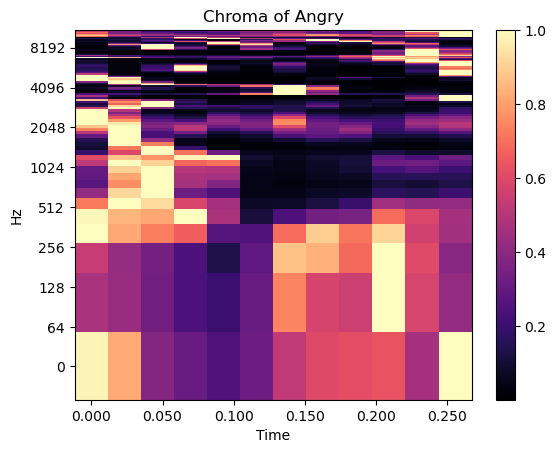

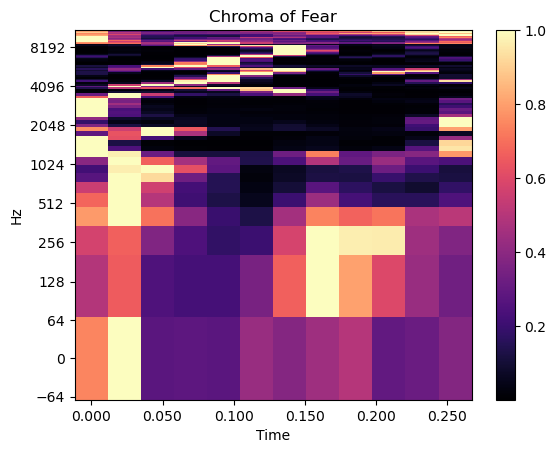

In [221]:
# chroma
# happy
chroma_happy = pd.DataFrame(columns=['chroma'])
for i in range(len(happy_train)):
    chroma = librosa.feature.chroma_stft(y=happy_train[i][0], sr=happy_train[i][1])
    chroma_happy.loc[i] = [chroma.T]

plt.figure(21)
librosa.display.specshow(chroma_happy['chroma'][0],sr=happy_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Chroma of Happy')
plt.show()

# sad
chroma_sad = pd.DataFrame(columns=['chroma'])
for i in range(len(sad_train)):
    chroma = librosa.feature.chroma_stft(y=sad_train[i][0], sr=sad_train[i][1])
    chroma_sad.loc[i] = [chroma.T]

plt.figure(22)
librosa.display.specshow(chroma_sad['chroma'][0],sr=sad_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Chroma of Sad')
plt.show()

# angry
chroma_angry = pd.DataFrame(columns=['chroma'])
for i in range(len(angry_train)):
    chroma = librosa.feature.chroma_stft(y=angry_train[i][0], sr=angry_train[i][1])
    chroma_angry.loc[i] = [chroma.T]

plt.figure(23)
librosa.display.specshow(chroma_angry['chroma'][0],sr=angry_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Chroma of Angry')
plt.show()

# fear
chroma_fear = pd.DataFrame(columns=['chroma'])
for i in range(len(fear_train)):
    chroma = librosa.feature.chroma_stft(y=fear_train[i][0], sr=fear_train[i][1])
    chroma_fear.loc[i] = [chroma.T]

plt.figure(24)
librosa.display.specshow(chroma_fear['chroma'][0],sr=fear_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Chroma of Fear')
plt.show()

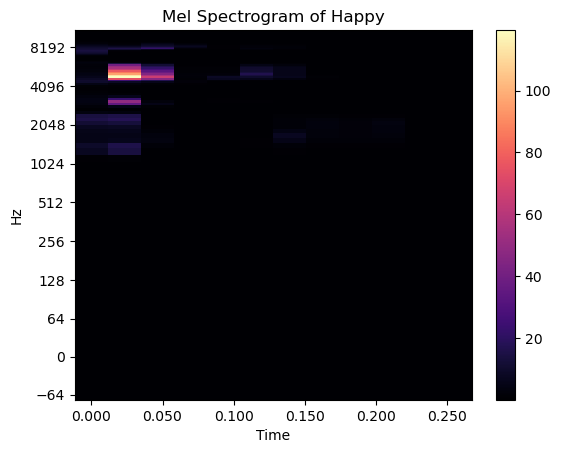

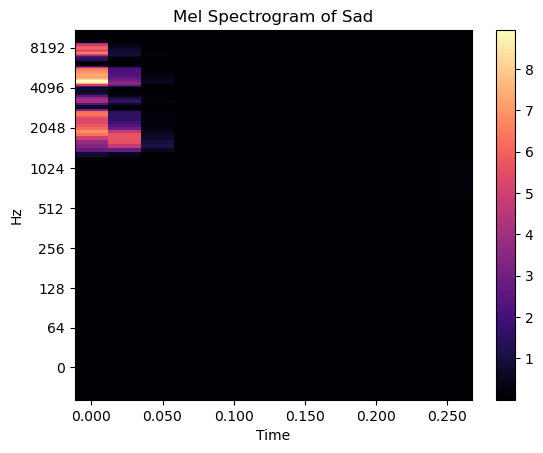

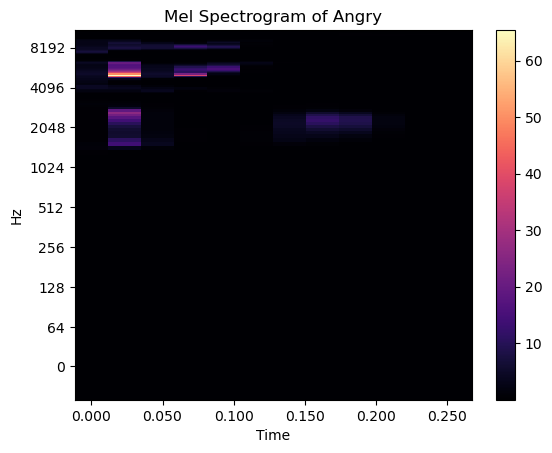

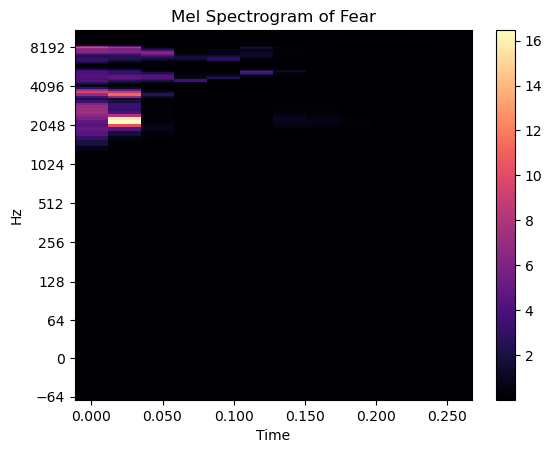

In [222]:
# mel spectrogram
# happy
mel_happy = pd.DataFrame(columns=['mel'])
for i in range(len(happy_train)):
    mel = librosa.feature.melspectrogram(y=happy_train[i][0], sr=happy_train[i][1], n_mels=12)
    mel_happy.loc[i] = [mel.T]

plt.figure(25)
librosa.display.specshow(mel_happy['mel'][0],sr=happy_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mel Spectrogram of Happy')
plt.show()

# sad
mel_sad = pd.DataFrame(columns=['mel'])
for i in range(len(sad_train)):
    mel = librosa.feature.melspectrogram(y=sad_train[i][0], sr=sad_train[i][1], n_mels=12)
    mel_sad.loc[i] = [mel.T]

plt.figure(26)
librosa.display.specshow(mel_sad['mel'][0],sr=sad_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mel Spectrogram of Sad')
plt.show()

# angry
mel_angry = pd.DataFrame(columns=['mel'])
for i in range(len(angry_train)):
    mel = librosa.feature.melspectrogram(y=angry_train[i][0], sr=angry_train[i][1], n_mels=12)
    mel_angry.loc[i] = [mel.T]

plt.figure(27)
librosa.display.specshow(mel_angry['mel'][0],sr=angry_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mel Spectrogram of Angry')
plt.show()

# fear
mel_fear = pd.DataFrame(columns=['mel'])
for i in range(len(fear_train)):
    mel = librosa.feature.melspectrogram(y=fear_train[i][0], sr=fear_train[i][1], n_mels=12)
    mel_fear.loc[i] = [mel.T]

plt.figure(28)
librosa.display.specshow(mel_fear['mel'][0],sr=fear_train[0][1], x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mel Spectrogram of Fear')
plt.show()


In [235]:
# combine all features
# happy
happy_feature_matrix = pd.concat([loudness_happy, mfcc_happy, zcr_happy, chroma_happy, mel_happy], axis=1)

# sad
sad_feature_matrix = pd.concat([loudness_sad, mfcc_sad, zcr_sad, chroma_sad, mel_sad], axis=1)

# angry
angry_feature_matrix = pd.concat([loudness_angry, mfcc_angry, zcr_angry, chroma_angry, mel_angry], axis=1)

# fear
fear_feature_matrix = pd.concat([loudness_fear, mfcc_fear, zcr_fear, chroma_fear, mel_fear], axis=1)


,loudness,mfcc,zcr,chroma,mel
0,"[0.0024166039434396743, 0.006171196362865874, ...","[[-446.8273, -19.591019, 73.86795, 20.077404, ...","[0.275390625, 0.49169921875, 0.70068359375, 0....","[[0.81358707, 1.0, 0.8735173, 0.94097406, 0.79...","[[0.005605219, 0.000120955614, 2.2855917e-05, ..."
1,"[0.0008163046882498804, 0.0028786453482028533,...","[[-500.36462, -0.463454, 51.094406, 33.90188, ...","[0.23291015625, 0.4375, 0.640625, 0.7631835937...","[[0.70855796, 0.9336344, 0.9193639, 0.6938686,...","[[0.0011942481, 0.00010472398, 1.4843614e-05, ..."
2,"[0.0032249717810566587, 0.005912708774251485, ...","[[-459.30597, -72.54625, 55.27728, -4.073771, ...","[0.3828125, 0.56689453125, 0.74853515625, 0.75...","[[0.26851463, 0.6502423, 0.73383063, 1.0, 0.52...","[[5.622854e-05, 2.7528897e-05, 2.4778035e-05, ..."
3,"[0.0024285156834450523, 0.006104500810267403, ...","[[-475.6708, -43.62088, 77.05521, -8.131381, 2...","[0.38916015625, 0.6103515625, 0.82177734375, 0...","[[0.3971075, 0.9034885, 1.0, 0.6982536, 0.6019...","[[0.00027687632, 4.5149845e-05, 1.4812438e-05,..."
4,"[0.006919755955903288, 0.011657860265693584, 0...","[[-398.16238, -78.0853, 54.593197, -7.3880634,...","[0.38720703125, 0.5869140625, 0.79296875, 0.82...","[[0.5020457, 1.0, 0.991568, 0.72493875, 0.6252...","[[0.000121810626, 0.00012219202, 7.702112e-05,..."


In [236]:
# scale all values to [-1, 1] inclusive in feature matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# happy
for i in range(len(happy_feature_matrix)):
    happy_feature_matrix.iloc[i, 0] = scaler.fit_transform(happy_feature_matrix.iloc[i, 0].reshape(-1, 1))
    happy_feature_matrix.iloc[i, 1] = scaler.fit_transform(happy_feature_matrix.iloc[i, 1].reshape(-1, 1))
    happy_feature_matrix.iloc[i, 2] = scaler.fit_transform(happy_feature_matrix.iloc[i, 2].reshape(-1, 1))
    happy_feature_matrix.iloc[i, 3] = scaler.fit_transform(happy_feature_matrix.iloc[i, 3].reshape(-1, 1))
    happy_feature_matrix.iloc[i, 4] = scaler.fit_transform(happy_feature_matrix.iloc[i, 4].reshape(-1, 1))

# sad
for i in range(len(sad_feature_matrix)):
    sad_feature_matrix.iloc[i, 0] = scaler.fit_transform(sad_feature_matrix.iloc[i, 0].reshape(-1, 1))
    sad_feature_matrix.iloc[i, 1] = scaler.fit_transform(sad_feature_matrix.iloc[i, 1].reshape(-1, 1))
    sad_feature_matrix.iloc[i, 2] = scaler.fit_transform(sad_feature_matrix.iloc[i, 2].reshape(-1, 1))
    sad_feature_matrix.iloc[i, 3] = scaler.fit_transform(sad_feature_matrix.iloc[i, 3].reshape(-1, 1))
    sad_feature_matrix.iloc[i, 4] = scaler.fit_transform(sad_feature_matrix.iloc[i, 4].reshape(-1, 1))

# angry
for i in range(len(angry_feature_matrix)):
    angry_feature_matrix.iloc[i, 0] = scaler.fit_transform(angry_feature_matrix.iloc[i, 0].reshape(-1, 1))
    angry_feature_matrix.iloc[i, 1] = scaler.fit_transform(angry_feature_matrix.iloc[i, 1].reshape(-1, 1))
    angry_feature_matrix.iloc[i, 2] = scaler.fit_transform(angry_feature_matrix.iloc[i, 2].reshape(-1, 1))
    angry_feature_matrix.iloc[i, 3] = scaler.fit_transform(angry_feature_matrix.iloc[i, 3].reshape(-1, 1))
    angry_feature_matrix.iloc[i, 4] = scaler.fit_transform(angry_feature_matrix.iloc[i, 4].reshape(-1, 1))

# fear
for i in range(len(fear_feature_matrix)):
    fear_feature_matrix.iloc[i, 0] = scaler.fit_transform(fear_feature_matrix.iloc[i, 0].reshape(-1, 1))
    fear_feature_matrix.iloc[i, 1] = scaler.fit_transform(fear_feature_matrix.iloc[i, 1].reshape(-1, 1))
    fear_feature_matrix.iloc[i, 2] = scaler.fit_transform(fear_feature_matrix.iloc[i, 2].reshape(-1, 1))
    fear_feature_matrix.iloc[i, 3] = scaler.fit_transform(fear_feature_matrix.iloc[i, 3].reshape(-1, 1))
    fear_feature_matrix.iloc[i, 4] = scaler.fit_transform(fear_feature_matrix.iloc[i, 4].reshape(-1, 1))

happy_feature_matrix.head(5)

,loudness,mfcc,zcr,chroma,mel
0,"[-0.9763877166525667, -0.9327750454070526, -0....","[-0.747749, 0.5650469, 0.8522242, 0.6869386, 0...","[-0.3767942583732057, 0.15311004784689008, 0.6...","[0.6271392, 1.0, 0.7470108, 0.881937, 0.595895...","[-0.99990624, -0.999998, -0.99999964, -0.99999..."
1,"[-1.0, -0.9615405563344266, -0.919560156839580...","[-0.98557866, 0.6146517, 0.7796932, 0.7246583,...","[-0.4321608040201004, 0.0942211055276383, 0.61...","[0.41706312, 0.8672569, 0.8387133, 0.3876816, ...","[-0.99995434, -0.999996, -0.9999994, -0.999999..."
2,"[-0.9681506322857615, -0.9230794694093745, -0....","[-0.8362658, 0.4174504, 0.8318018, 0.6394101, ...","[-0.007348029392117539, 0.49632598530394145, 0...","[-0.46310788, 0.3004191, 0.46761143, 1.0000001...","[-0.9999982, -0.9999991, -0.9999992, -0.999999..."
3,"[-0.9999999999999999, -0.9503780285413793, -0....","[-0.9499346, 0.4718586, 0.8689804, 0.5886477, ...","[-0.10280373831775702, 0.42640186915887845, 0....","[-0.20617181, 0.80691516, 1.0, 0.39631355, 0.2...","[-0.99999285, -0.9999988, -0.99999964, -0.9999..."
4,"[-0.9775176299545429, -0.9219242184073433, -0....","[-0.6834005, 0.3846564, 0.8273878, 0.62056416,...","[-0.08515815085158152, 0.4124087591240877, 0.9...","[0.0040102005, 1.0000001, 0.98313475, 0.449832...","[-0.9999977, -0.9999977, -0.99999857, -0.99999..."


In [238]:
# combine all average of each feature into one column

# happy
for i in range(len(happy_feature_matrix)):
    happy_feature_matrix.iloc[i, 0] = np.mean(happy_feature_matrix.iloc[i, 0])
    happy_feature_matrix.iloc[i, 1] = np.mean(happy_feature_matrix.iloc[i, 1])
    happy_feature_matrix.iloc[i, 2] = np.mean(happy_feature_matrix.iloc[i, 2])
    happy_feature_matrix.iloc[i, 3] = np.mean(happy_feature_matrix.iloc[i, 3])
    happy_feature_matrix.iloc[i, 4] = np.mean(happy_feature_matrix.iloc[i, 4])

# sad
for i in range(len(sad_feature_matrix)):
    sad_feature_matrix.iloc[i, 0] = np.mean(sad_feature_matrix.iloc[i, 0])
    sad_feature_matrix.iloc[i, 1] = np.mean(sad_feature_matrix.iloc[i, 1])
    sad_feature_matrix.iloc[i, 2] = np.mean(sad_feature_matrix.iloc[i, 2])
    sad_feature_matrix.iloc[i, 3] = np.mean(sad_feature_matrix.iloc[i, 3])
    sad_feature_matrix.iloc[i, 4] = np.mean(sad_feature_matrix.iloc[i, 4])

# angry
for i in range(len(angry_feature_matrix)):
    angry_feature_matrix.iloc[i, 0] = np.mean(angry_feature_matrix.iloc[i, 0])
    angry_feature_matrix.iloc[i, 1] = np.mean(angry_feature_matrix.iloc[i, 1])
    angry_feature_matrix.iloc[i, 2] = np.mean(angry_feature_matrix.iloc[i, 2])
    angry_feature_matrix.iloc[i, 3] = np.mean(angry_feature_matrix.iloc[i, 3])
    angry_feature_matrix.iloc[i, 4] = np.mean(angry_feature_matrix.iloc[i, 4])

# fear
for i in range(len(fear_feature_matrix)):
    fear_feature_matrix.iloc[i, 0] = np.mean(fear_feature_matrix.iloc[i, 0])
    fear_feature_matrix.iloc[i, 1] = np.mean(fear_feature_matrix.iloc[i, 1])
    fear_feature_matrix.iloc[i, 2] = np.mean(fear_feature_matrix.iloc[i, 2])
    fear_feature_matrix.iloc[i, 3] = np.mean(fear_feature_matrix.iloc[i, 3])
    fear_feature_matrix.iloc[i, 4] = np.mean(fear_feature_matrix.iloc[i, 4])


,loudness,mfcc,zcr,chroma,mel
0,-0.471793,0.541782,-0.539731,-0.47112,-0.960776
1,-0.259481,0.530034,-0.604973,-0.521334,-0.946907
2,-0.322929,0.563586,-0.67954,-0.532308,-0.948788
3,-0.356275,0.529696,-0.656557,-0.59735,-0.934636
4,-0.444192,0.555664,-0.670717,-0.5922,-0.947818


In [239]:
# get the sum of each feature combining it into one column

# happy
for i in range(len(happy_feature_matrix)):
    happy_feature_matrix.iloc[i, 0] = np.sum(happy_feature_matrix.iloc[i, 0])
    happy_feature_matrix.iloc[i, 1] = np.sum(happy_feature_matrix.iloc[i, 1])
    happy_feature_matrix.iloc[i, 2] = np.sum(happy_feature_matrix.iloc[i, 2])
    happy_feature_matrix.iloc[i, 3] = np.sum(happy_feature_matrix.iloc[i, 3])
    happy_feature_matrix.iloc[i, 4] = np.sum(happy_feature_matrix.iloc[i, 4])

# sad
for i in range(len(sad_feature_matrix)):
    sad_feature_matrix.iloc[i, 0] = np.sum(sad_feature_matrix.iloc[i, 0])
    sad_feature_matrix.iloc[i, 1] = np.sum(sad_feature_matrix.iloc[i, 1])
    sad_feature_matrix.iloc[i, 2] = np.sum(sad_feature_matrix.iloc[i, 2])
    sad_feature_matrix.iloc[i, 3] = np.sum(sad_feature_matrix.iloc[i, 3])
    sad_feature_matrix.iloc[i, 4] = np.sum(sad_feature_matrix.iloc[i, 4])

# angry
for i in range(len(angry_feature_matrix)):
    angry_feature_matrix.iloc[i, 0] = np.sum(angry_feature_matrix.iloc[i, 0])
    angry_feature_matrix.iloc[i, 1] = np.sum(angry_feature_matrix.iloc[i, 1])
    angry_feature_matrix.iloc[i, 2] = np.sum(angry_feature_matrix.iloc[i, 2])
    angry_feature_matrix.iloc[i, 3] = np.sum(angry_feature_matrix.iloc[i, 3])
    angry_feature_matrix.iloc[i, 4] = np.sum(angry_feature_matrix.iloc[i, 4])

# fear
for i in range(len(fear_feature_matrix)):
    fear_feature_matrix.iloc[i, 0] = np.sum(fear_feature_matrix.iloc[i, 0])
    fear_feature_matrix.iloc[i, 1] = np.sum(fear_feature_matrix.iloc[i, 1])
    fear_feature_matrix.iloc[i, 2] = np.sum(fear_feature_matrix.iloc[i, 2])
    fear_feature_matrix.iloc[i, 3] = np.sum(fear_feature_matrix.iloc[i, 3])
    fear_feature_matrix.iloc[i, 4] = np.sum(fear_feature_matrix.iloc[i, 4])

,loudness,mfcc,zcr,chroma,mel
0,-0.471793,0.541782,-0.539731,-0.47112,-0.960776
1,-0.259481,0.530034,-0.604973,-0.521334,-0.946907
2,-0.322929,0.563586,-0.67954,-0.532308,-0.948788
3,-0.356275,0.529696,-0.656557,-0.59735,-0.934636
4,-0.444192,0.555664,-0.670717,-0.5922,-0.947818


In [303]:
# we want to train each emotion model

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# happy
happy_train_label = np.zeros(len(happy_feature_matrix))
happy_train_label[:len(happy_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(happy_feature_matrix, happy_train_label, test_size=0.2, random_state=42)

print("Happy: ")

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of SVC: ', accuracy_score(y_test, y_pred))

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
print('Accuracy of NVB: ', accuracy_score(y_test, y_pred))

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy of RFC: ', accuracy_score(y_test, y_pred))

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN: ', accuracy_score(y_test, y_pred))

print('--------------------------------------------------')
print("Sad: ")

# sad
sad_train_label = np.zeros(len(sad_feature_matrix))
sad_train_label[:len(sad_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(sad_feature_matrix, sad_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of SVC: ', accuracy_score(y_test, y_pred))

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
print('Accuracy of NVB: ', accuracy_score(y_test, y_pred))

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy of RFC: ', accuracy_score(y_test, y_pred))

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN: ', accuracy_score(y_test, y_pred))

print('--------------------------------------------------')
print("Angry: ")

# angry
angry_train_label = np.zeros(len(angry_feature_matrix))
angry_train_label[:len(angry_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(angry_feature_matrix, angry_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of SVC: ', accuracy_score(y_test, y_pred))

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
print('Accuracy of NVB: ', accuracy_score(y_test, y_pred))

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy of RFC: ', accuracy_score(y_test, y_pred))

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN: ', accuracy_score(y_test, y_pred))

print('--------------------------------------------------')
print("Fear: ")

# fear
fear_train_label = np.zeros(len(fear_feature_matrix))
fear_train_label[:len(fear_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(fear_feature_matrix, fear_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of SVC: ', accuracy_score(y_test, y_pred))

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
print('Accuracy of NVB: ', accuracy_score(y_test, y_pred))

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy of RFC: ', accuracy_score(y_test, y_pred))

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN: ', accuracy_score(y_test, y_pred))


Happy: 
Accuracy of SVC:  0.9285714285714286
Accuracy of NVB:  0.9285714285714286
Accuracy of RFC:  0.9285714285714286
Accuracy of KNN:  0.9285714285714286
--------------------------------------------------
Sad: 
Accuracy of SVC:  0.9285714285714286
Accuracy of NVB:  0.8571428571428571
Accuracy of RFC:  0.9285714285714286
Accuracy of KNN:  0.9285714285714286
--------------------------------------------------
Angry: 
Accuracy of SVC:  0.9285714285714286
Accuracy of NVB:  0.9285714285714286
Accuracy of RFC:  0.9285714285714286
Accuracy of KNN:  0.9285714285714286
--------------------------------------------------
Fear: 
Accuracy of SVC:  0.9285714285714286
Accuracy of NVB:  0.7857142857142857
Accuracy of RFC:  0.9285714285714286
Accuracy of KNN:  0.9285714285714286


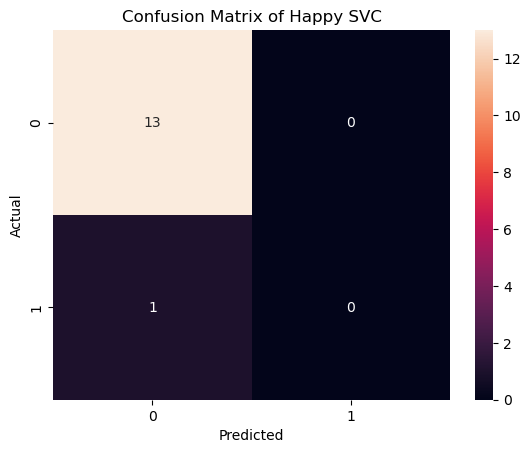

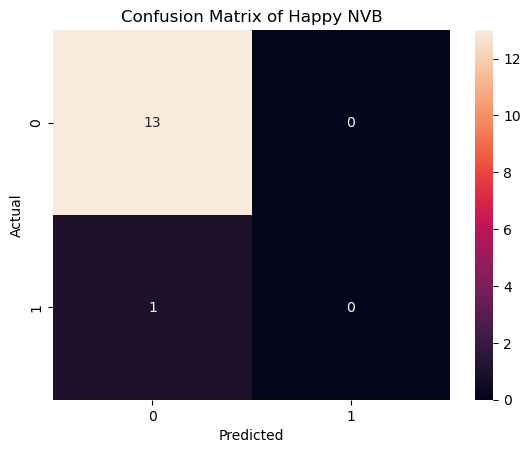

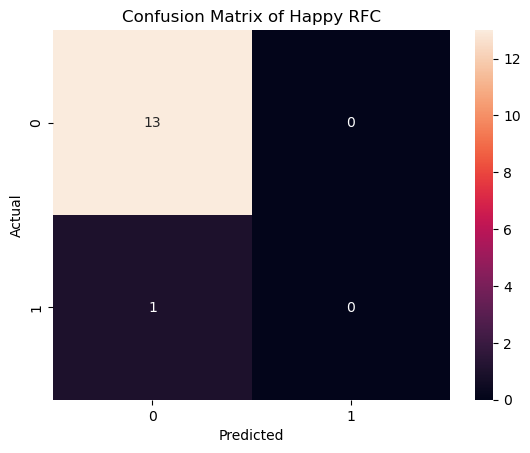

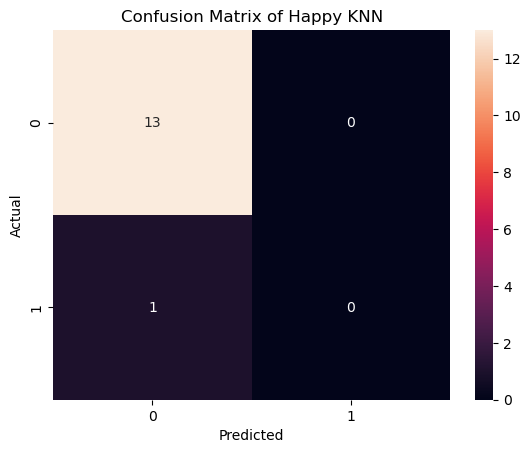

--------------------------------------------------


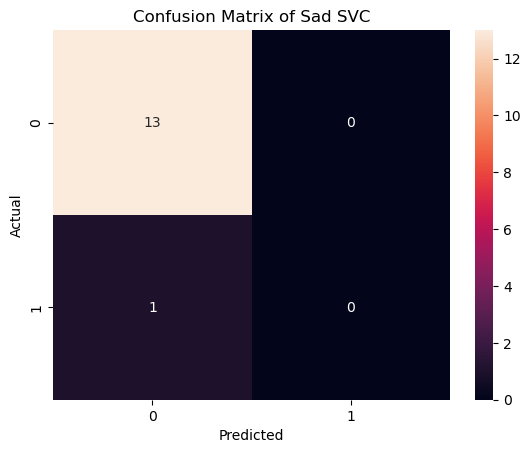

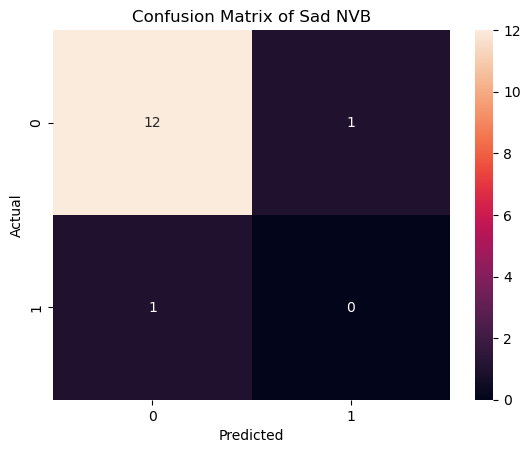

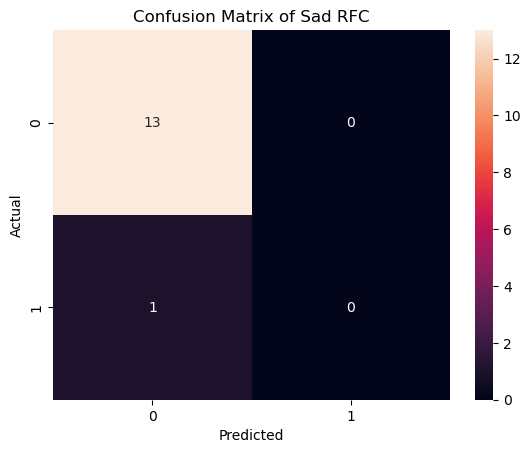

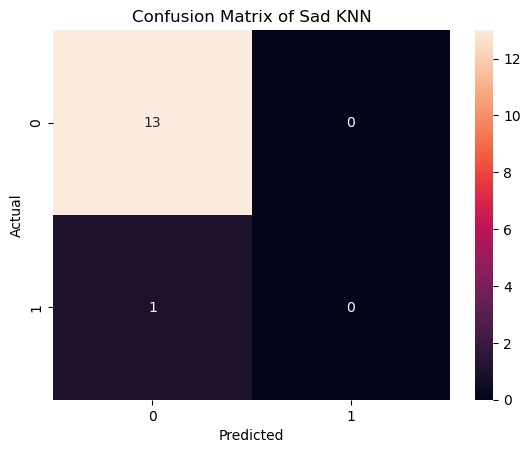

--------------------------------------------------


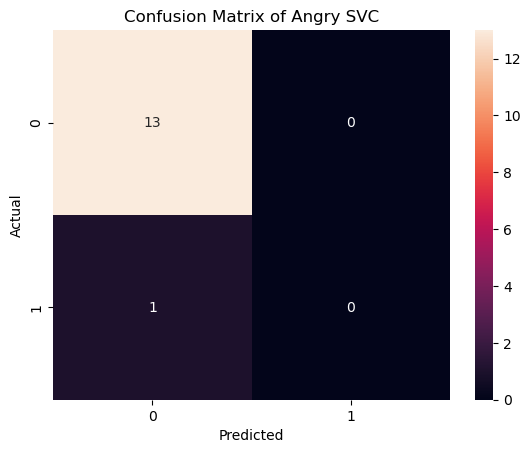

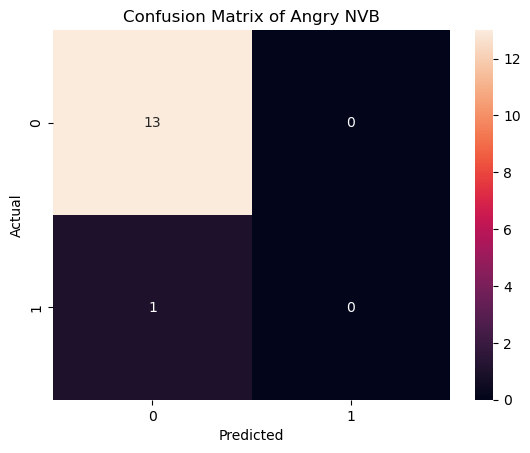

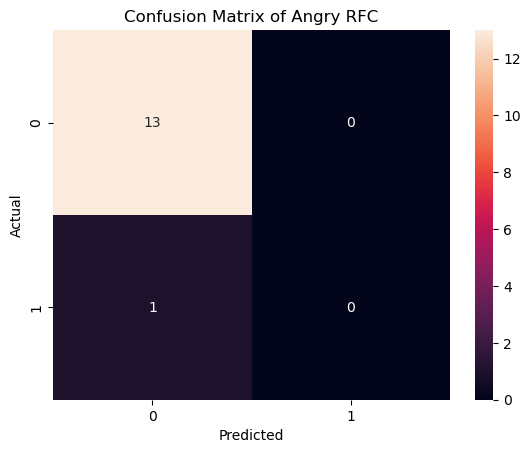

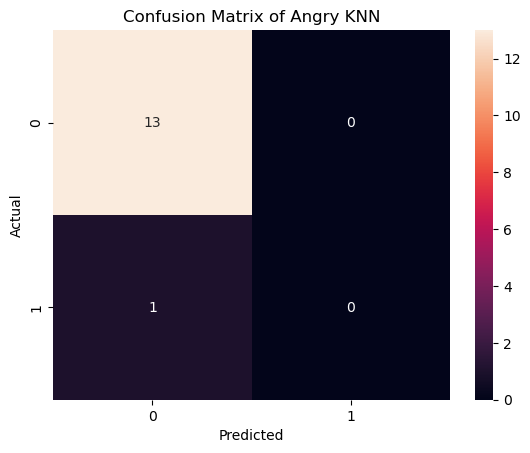

--------------------------------------------------


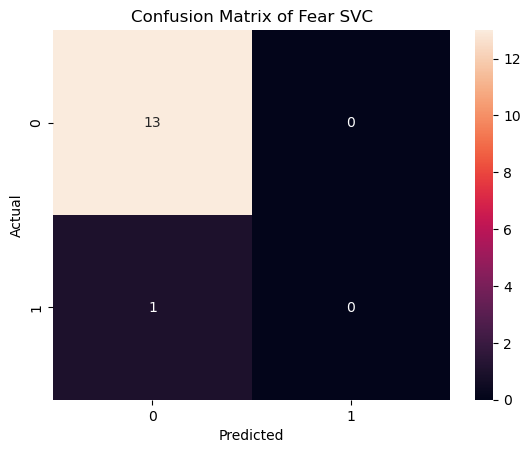

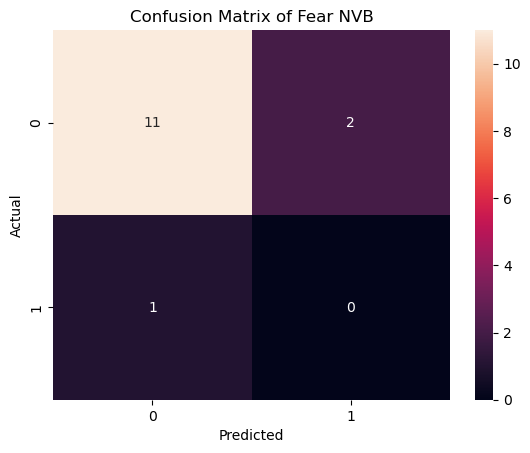

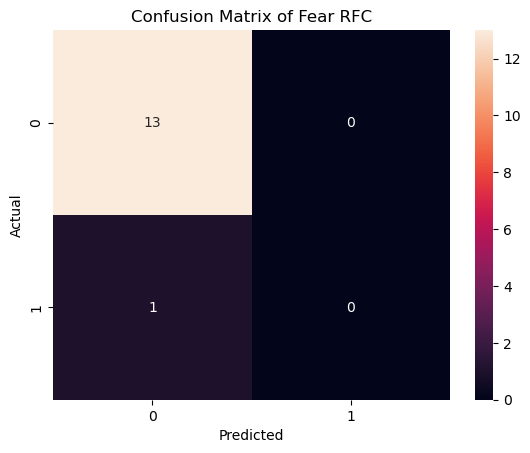

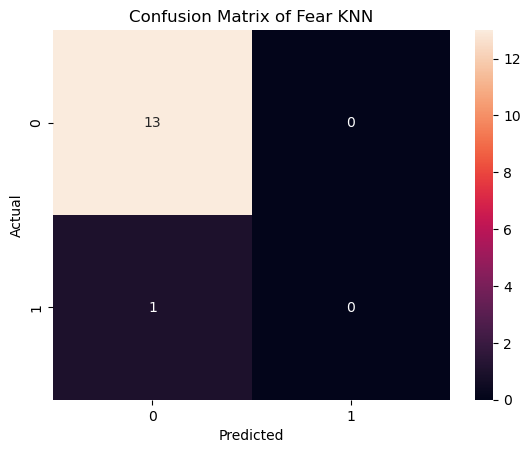

In [308]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# happy
happy_train_label = np.zeros(len(happy_feature_matrix))
happy_train_label[:len(happy_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(happy_feature_matrix, happy_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Happy SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Happy NVB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Happy RFC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Happy KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('--------------------------------------------------')

# sad
sad_train_label = np.zeros(len(sad_feature_matrix))
sad_train_label[:len(sad_feature_matrix)//15] = 1
X_train, X_test, y_train, y_test = train_test_split(sad_feature_matrix, sad_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Sad SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Sad NVB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Sad RFC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Sad KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('--------------------------------------------------')

# angry
angry_train_label = np.zeros(len(angry_feature_matrix))
angry_train_label[:len(angry_feature_matrix)//15] = 1

X_train, X_test, y_train, y_test = train_test_split(angry_feature_matrix, angry_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Angry SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Angry NVB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Angry RFC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Angry KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('--------------------------------------------------')

# fear
fear_train_label = np.zeros(len(fear_feature_matrix))
fear_train_label[:len(fear_feature_matrix)//15] = 1

X_train, X_test, y_train, y_test = train_test_split(fear_feature_matrix, fear_train_label, test_size=0.2, random_state=42)

# SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Fear SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# NVB
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred = nvb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Fear NVB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# RFC
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Fear RFC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix of Fear KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


